<h1 style="margin-bottom: 0px; fontcolor:'red'"><center><strong>Universidade Federal do Rio de Janeiro</strong></center></h1>
<h3><center><strong>Programa de Pós-Graduação em Meteorologia</strong></center></h3>
<h4><center>Disciplina de Instrumentação Oceanográfica</center></h4>
<h4><center>Atividade III</center></h4>
<h4><center>Estação Meteorológica</center></h4>

In [1]:
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from windrose import WindroseAxes
from windrose import plot_windrose
%matplotlib inline

In [2]:
# Configurando alguns padroes para as figuras
figsize_plots = (16,6)
fontsize_legend = 14
fontsize_title = 16
fontsize_ticks = 14
fontsize_label = 14


### Carregando os dados...

In [3]:
header_file = ['timestamp', 'record','battery','wspd','wdir','wdir_std','wspd_std','max_wspd','atmp','rh','pres']

df_day_interval = pd.read_csv('/home/ocf/POS_UFRJ/ASSIGNMENTS/Instrumentacao_Oceanografica/Assignment_III/dataset/CR1000-M1_1D.dat', 
                              skiprows=4, 
                              header = None,
                              names=header_file)

df_hour_interval = pd.read_csv('/home/ocf/POS_UFRJ/ASSIGNMENTS/Instrumentacao_Oceanografica/Assignment_III/dataset/CR1000-M1_60.dat', 
                              skiprows=4, 
                              header = None,
                              names=header_file)

df_10min_interval = pd.read_csv('/home/ocf/POS_UFRJ/ASSIGNMENTS/Instrumentacao_Oceanografica/Assignment_III/dataset/CR1000-M1_10.dat', 
                              skiprows=4, 
                              header = None,
                              names=header_file)

In [4]:
# checando os tipos de dados
df_day_interval.dtypes

timestamp     object
record         int64
battery      float64
wspd         float64
wdir         float64
wdir_std     float64
wspd_std     float64
max_wspd     float64
atmp         float64
rh           float64
pres         float64
dtype: object

In [5]:
df_day_interval['timestamp'] = pd.to_datetime(df_day_interval['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_hour_interval['timestamp'] = pd.to_datetime(df_hour_interval['timestamp'], format="%Y-%m-%d %H:%M:%S")
df_10min_interval['timestamp'] = pd.to_datetime(df_10min_interval['timestamp'], format="%Y-%m-%d %H:%M:%S")

# Correções Necessárias

### 1. Correção dos dados direcionais (de vento) para o norte verdadeiro.

Considerando o valor da Declinação Magnética para Salvador, -23.3634°, é somado este valor aos dados de direção de vento:

In [6]:
dm = -23.3634

df_day_interval['wdir_tn'] = df_day_interval['wdir'] - 23.3634
df_hour_interval['wdir_tn'] = df_hour_interval['wdir'] - 23.3634
df_10min_interval['wdir_tn'] = df_10min_interval['wdir'] - 23.3634 

### 2. Correção dos dados de velocidade para a altura de 10 metros

A estação meteorológica está instalada em uma altura de 25 metros preamar. Sendo assim, será aplicada a equação da Lei da Potência do Perfil de Vento:

u / ur = (z / zr) ^a

Onde u é a velocidade do vento, em m/s, z a altura em metros, ur é a velocidade conhecida do vento a uma altura conhecida zr. O expoenta a é um coeficiente empírico que depende da estabilidade atmosférica. Para condições neutras, o valor de a é aproximadamente 1/7.

Mais informações: http://mtc-m21b.sid.inpe.br/col/sid.inpe.br/mtc-m21b/2014/11.19.17.56/doc/09_%5BARTIGO%5D%5BCMC%5D_andreGermano.pdf


In [7]:
def wind_10_meters(df):
    
    wspd_10m = (10 / 25)**(1/7) * df['wspd']
    
    df['wspd_10m'] = wspd_10m
    
    return df
    
    

In [8]:
df_day_interval = wind_10_meters(df_day_interval)
df_hour_interval = wind_10_meters(df_hour_interval)
df_10min_interval = wind_10_meters(df_10min_interval)

### 3. Correção dados de pressão.

É indicado, no material fornecido com os dados, para somar aos dodos de pressão o valor de 700 mBar (hPa). 


In [9]:

df_day_interval['pres_corr'] = df_day_interval['pres'] + 700
df_hour_interval['pres_corr'] = df_hour_interval['pres'] + 700
df_10min_interval['pres_corr'] = df_10min_interval['pres'] + 700

### Explorando os dados de Vento

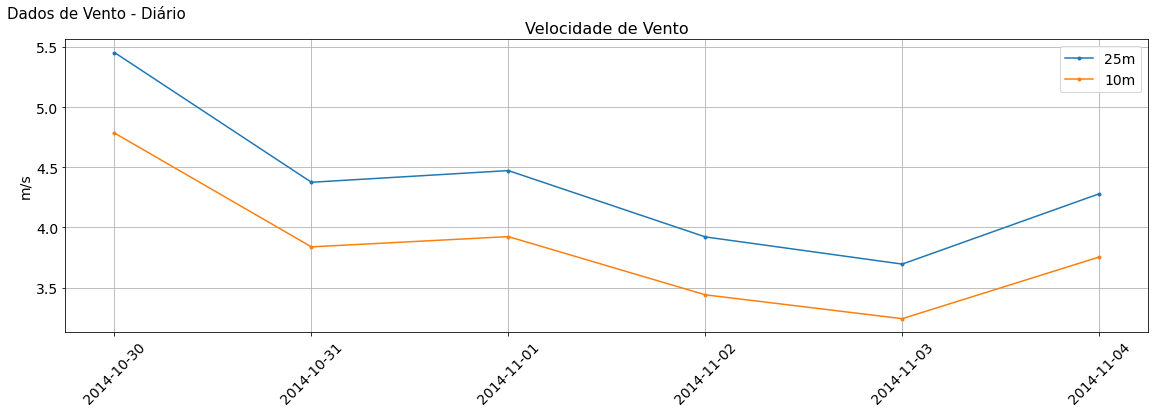

In [10]:
# Dados diários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - Diário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_day_interval['timestamp'], df_day_interval['wspd'], marker=".", label = "25m")
ax.plot(df_day_interval['timestamp'], df_day_interval['wspd_10m'], marker=".", label = "10m")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('m/s', fontsize = fontsize_label)
ax.set_title('Velocidade de Vento', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wspd_day.png', dpi = 300)

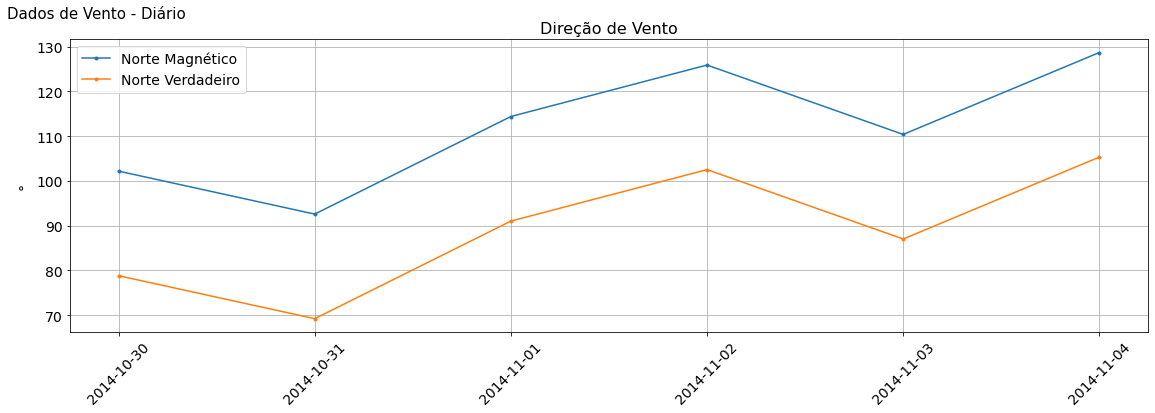

In [11]:


fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - Diário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_day_interval['timestamp'], df_day_interval['wdir'], marker=".", label="Norte Magnético")
ax.plot(df_day_interval['timestamp'], df_day_interval['wdir_tn'], marker=".", label="Norte Verdadeiro")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°', fontsize = fontsize_label)
ax.set_title('Direção de Vento', fontsize=fontsize_title)
ax.legend(fontsize=fontsize_legend)
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wdir_day.png', dpi = 300)

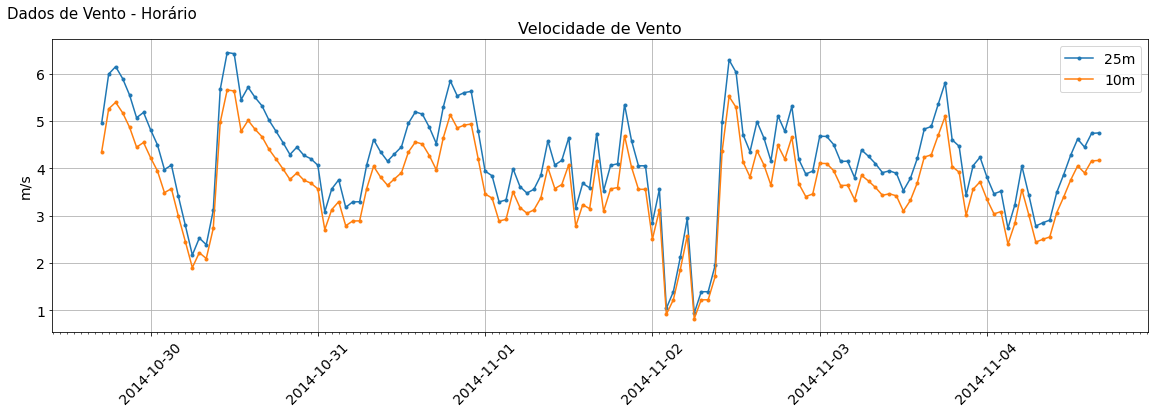

In [12]:
# Dados horários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - Horário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
hora = mdates.HourLocator(interval = 1)


ax.plot(df_hour_interval['timestamp'], df_hour_interval['wspd'], marker=".", label = "25m")
ax.plot(df_hour_interval['timestamp'], df_hour_interval['wspd_10m'], marker=".", label = "10m")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('m/s', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Velocidade de Vento', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wspd_hora.png', dpi = 300)

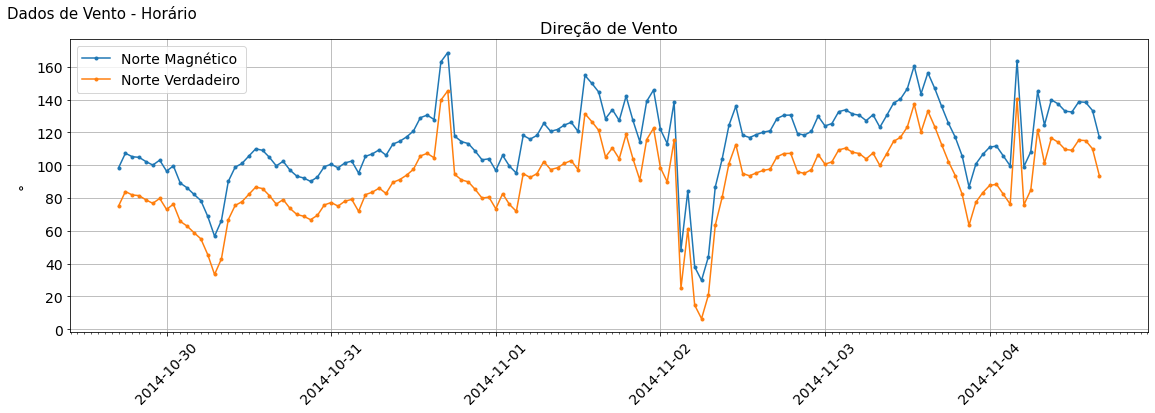

In [13]:
# Dados horários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - Horário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_hour_interval['timestamp'], df_hour_interval['wdir'], marker=".", label = "Norte Magnético")
ax.plot(df_hour_interval['timestamp'], df_hour_interval['wdir_tn'], marker=".", label = "Norte Verdadeiro")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Direção de Vento', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wdir_hora.png', dpi = 300)

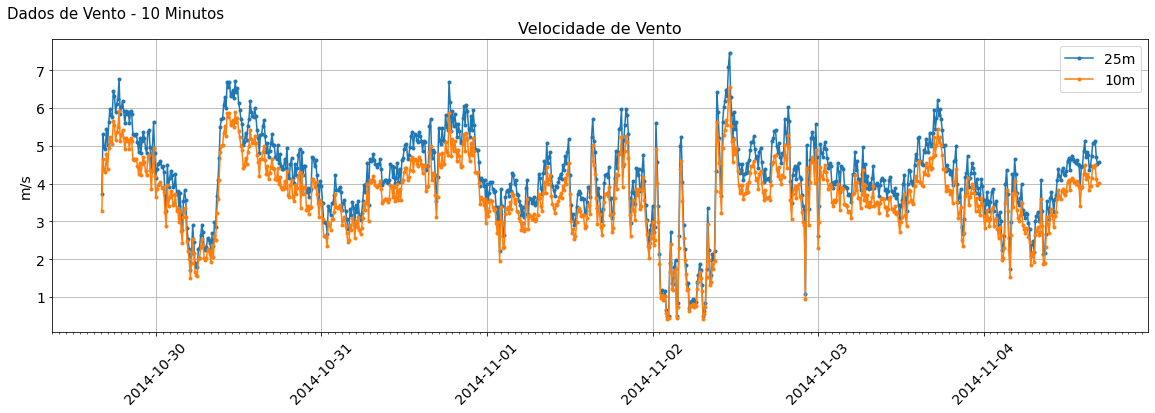

In [14]:
# Dados 10 minutos

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - 10 Minutos", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
hora = mdates.HourLocator(interval = 1)


ax.plot(df_10min_interval['timestamp'], df_10min_interval['wspd'], marker=".", label = "25m")
ax.plot(df_10min_interval['timestamp'], df_10min_interval['wspd_10m'], marker=".", label = "10m")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('m/s', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Velocidade de Vento', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wspd_10min.png', dpi = 300)

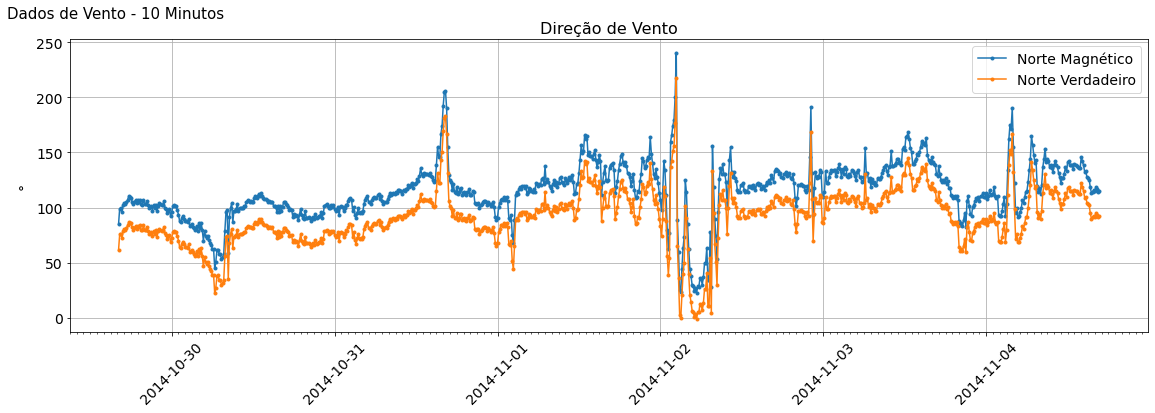

In [19]:
# Dados 10 min

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Vento - 10 Minutos", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

hora = mdates.HourLocator(interval = 1)


ax.plot(df_10min_interval['timestamp'], df_10min_interval['wdir'], marker=".", label = "Norte Magnético")
ax.plot(df_10min_interval['timestamp'], df_10min_interval['wdir_tn'], marker=".", label = "Norte Verdadeiro")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Direção de Vento', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/wdir_10min.png', dpi = 300)

#### Rosa dos Ventos

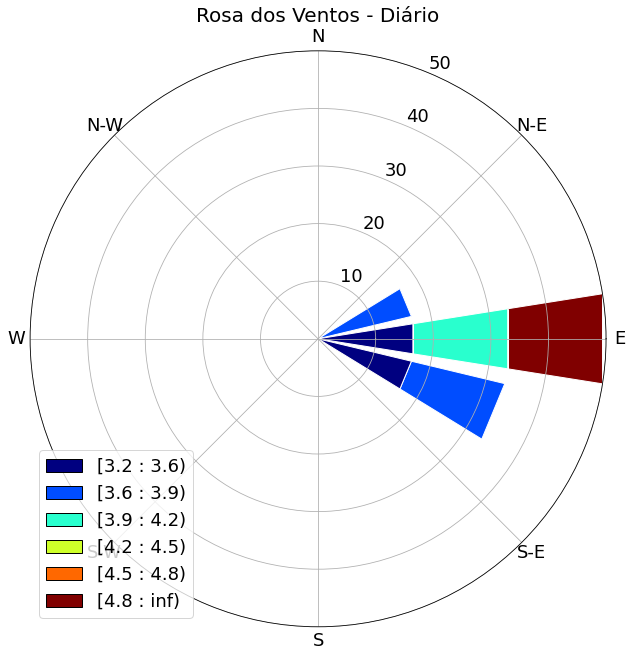

In [51]:
fig = plt.figure(figsize=(10,10))
rect = [0,0,0.8,0.8]
ax1 = WindroseAxes(fig, rect)
fig.add_axes(ax1)
ax1.bar(df_day_interval['wdir_tn'], df_day_interval['wspd_10m'], normed=True, opening=0.8, edgecolor='white')
ax1.set_title("Rosa dos Ventos - Diário", fontsize=fontsize_title + 4)
ax1.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('images/plots/rose_day.png', dpi = 300)
plt.show()

<Figure size 720x720 with 0 Axes>

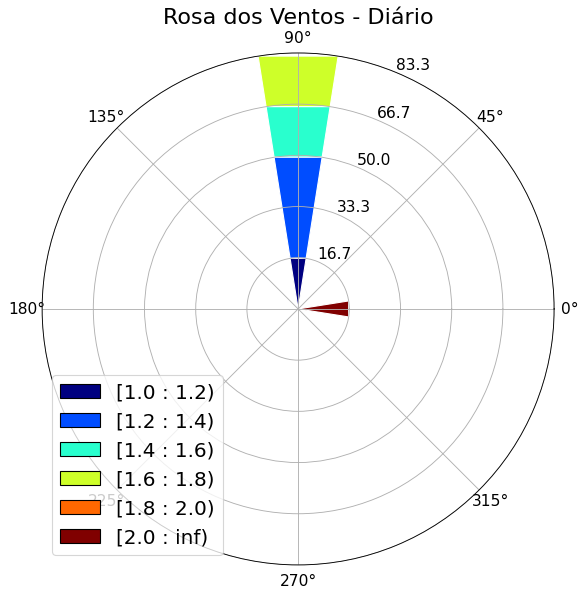

In [91]:
fig = plt.figure(figsize=(10,10))
ax1 = WindroseAxes.from_ax()
ax1.bar([0,0, 1, 0, 1, 80],[1,1.2,1.2,1.4,1.6, 2], normed=True, opening=0.8, edgecolor='white', blowto=False)
ax1.set_title("Rosa dos Ventos - Diário", fontsize=fontsize_title + 4)
ax1.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('images/plots/rose_day.png', dpi = 300)
plt.show()

<Figure size 720x720 with 0 Axes>

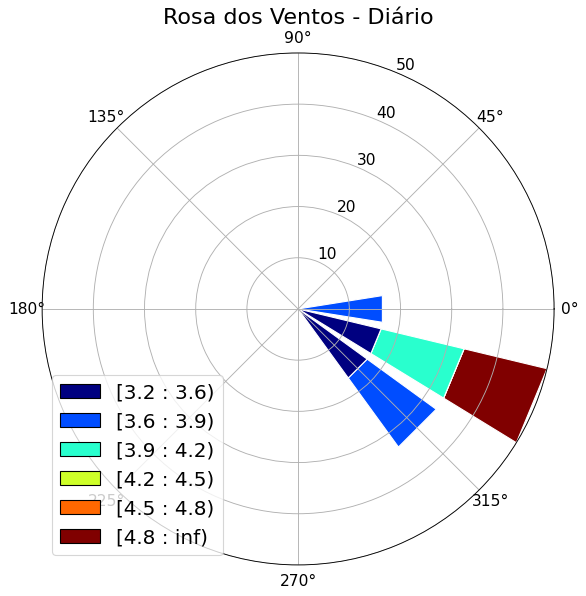

In [83]:
fig = plt.figure(figsize=(10,10))
ax1 = WindroseAxes.from_ax()
ax1.bar(df_day_interval['wdir'], df_day_interval['wspd_10m'], normed=True, opening=0.8, edgecolor='white')
ax1.set_title("Rosa dos Ventos - Diário", fontsize=fontsize_title + 4)
ax1.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('images/plots/rose_day.png', dpi = 300)
plt.show()

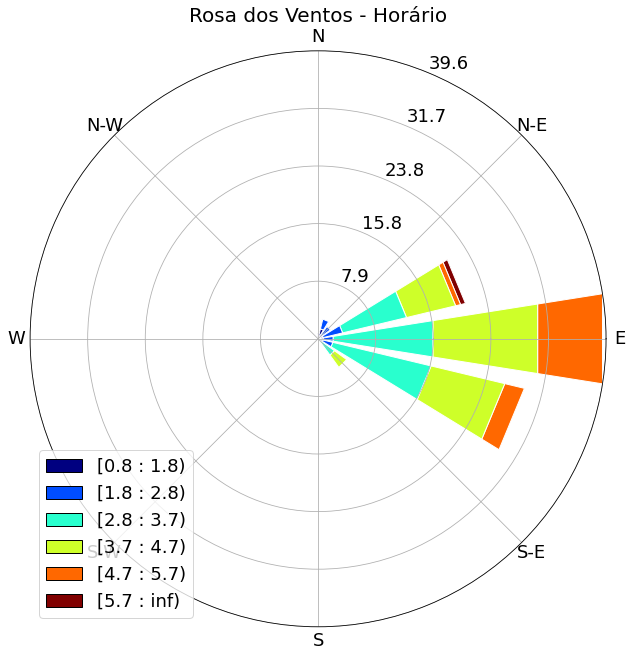

In [52]:
fig = plt.figure(figsize=(10,10))
rect = [0,0,0.8,0.8]
ax1 = WindroseAxes(fig, rect)
fig.add_axes(ax1)
ax1.bar(df_hour_interval['wdir_tn'], df_hour_interval['wspd_10m'], normed=True, opening=0.8, edgecolor='white')
ax1.set_title("Rosa dos Ventos - Horário", fontsize=fontsize_title + 4)
ax1.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('images/plots/rose_horario.png', dpi = 300)
plt.show()

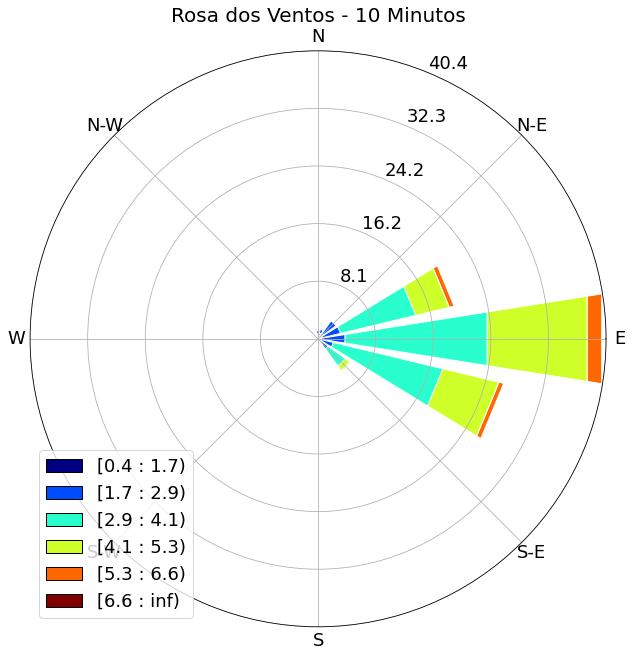

In [50]:
fig = plt.figure(figsize=(10,10))
rect = [0,0,0.8,0.8]
ax1 = WindroseAxes(fig, rect)
fig.add_axes(ax1)
ax1.bar(df_10min_interval['wdir_tn'], df_10min_interval['wspd_10m'], normed=True, opening=0.8, edgecolor='white')
ax1.set_title("Rosa dos Ventos - 10 Minutos", fontsize=fontsize_title + 4)
ax1.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('images/plots/rose_10min.png', dpi = 300)
plt.show()

### Dados de Temperatura do Ar

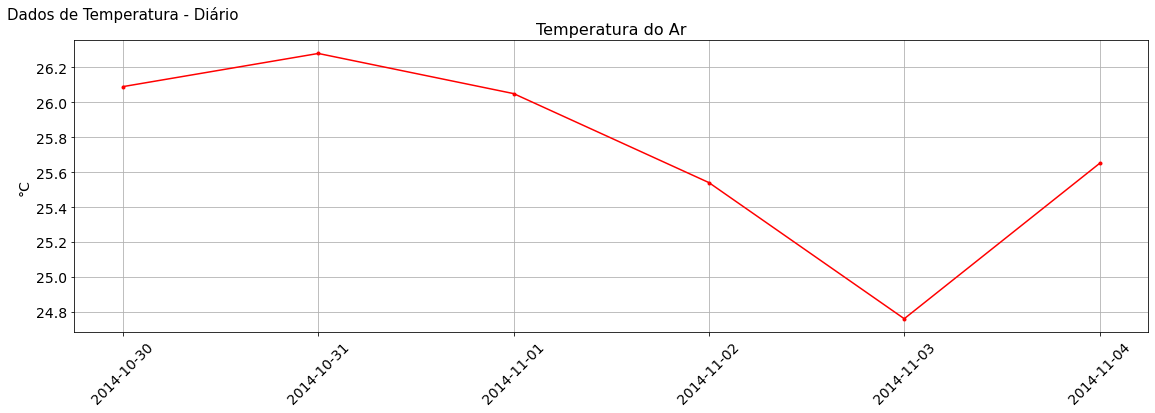

In [61]:
# Dados diários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Temperatura - Diário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_day_interval['timestamp'], df_day_interval['atmp'], marker=".", color = "red")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.xaxis.set_minor_locator(min30)
ax.set_title('Temperatura do Ar', fontsize = fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/atmp_day.png', dpi = 300)

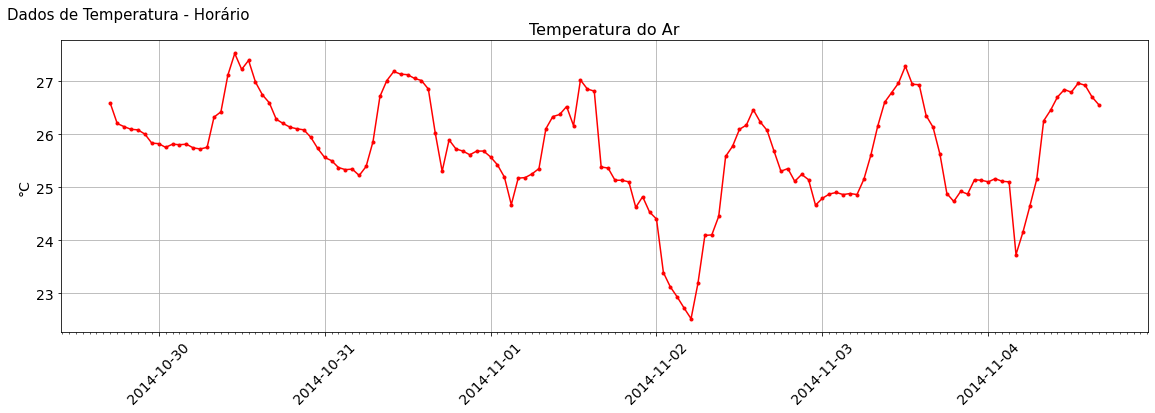

In [60]:
# Dados Horários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Temperatura - Horário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
hora = mdates.HourLocator(interval = 1)


ax.plot(df_hour_interval['timestamp'], df_hour_interval['atmp'], marker=".", color = "red")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Temperatura do Ar', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/atmp_horario.png', dpi = 300)

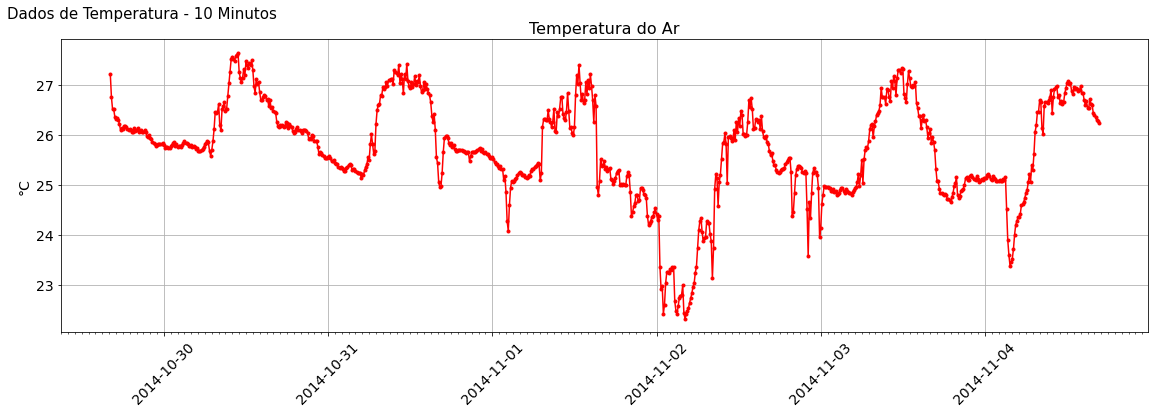

In [59]:
# Dados 10 min

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Temperatura - 10 Minutos", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)


hora = mdates.HourLocator(interval = 1)


ax.plot(df_10min_interval['timestamp'], df_10min_interval['atmp'], marker=".", color = "red")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Temperatura do Ar', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/atmp_10min.png', dpi = 300)

### Explorando dados de Umidade Relativa

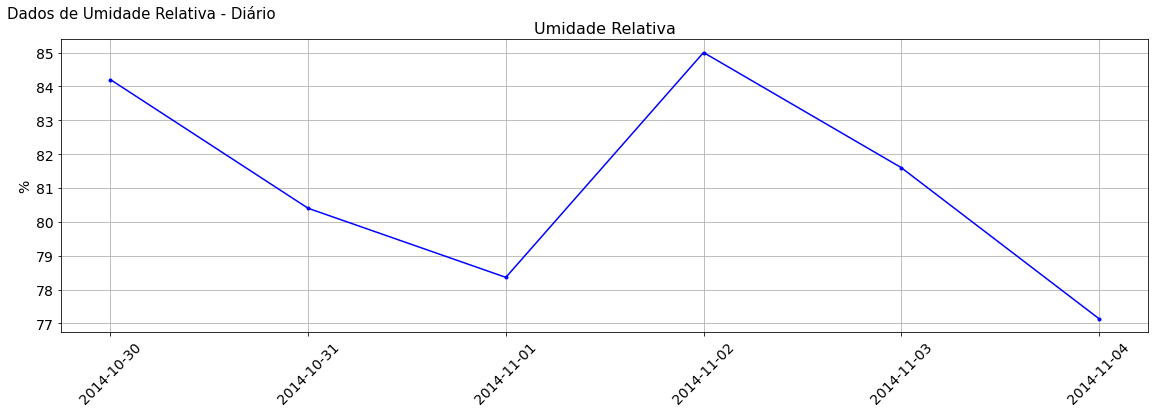

In [58]:
# Dados diários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Umidade Relativa - Diário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_day_interval['timestamp'], df_day_interval['rh'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('%', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.xaxis.set_minor_locator(min30)
ax.set_title('Umidade Relativa', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/rh_day.png', dpi = 300)

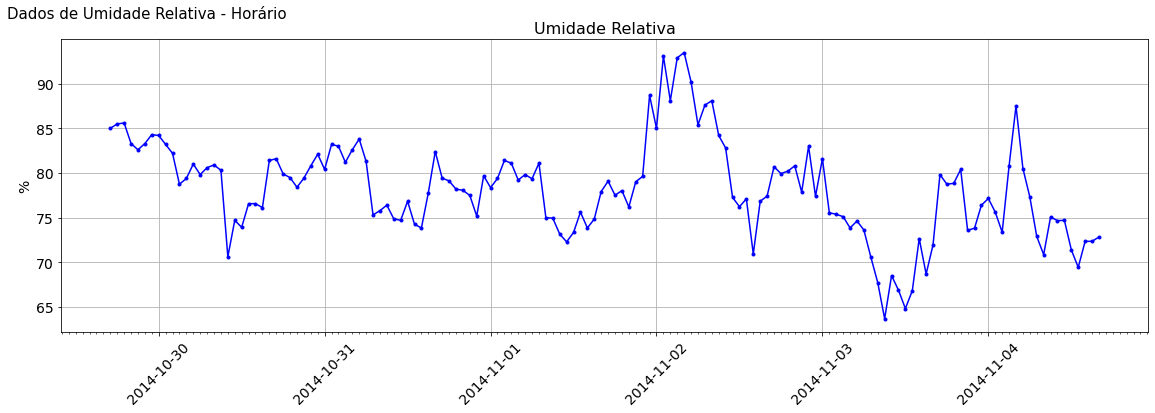

In [56]:
# Dados horarios

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Umidade Relativa - Horário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(df_hour_interval['timestamp'], df_hour_interval['rh'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('%', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Umidade Relativa', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/rh_hour.png', dpi = 300)

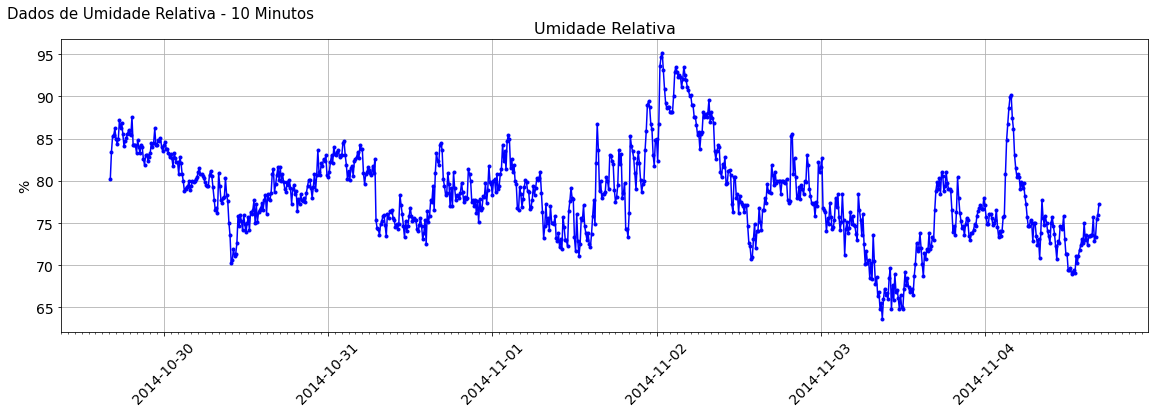

In [55]:
# Dados 10 min

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Umidade Relativa - 10 Minutos", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(df_10min_interval['timestamp'], df_10min_interval['rh'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('%', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Umidade Relativa', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/rh_10min.png', dpi = 300)

### Explorando dados de Pressão Atmosférica

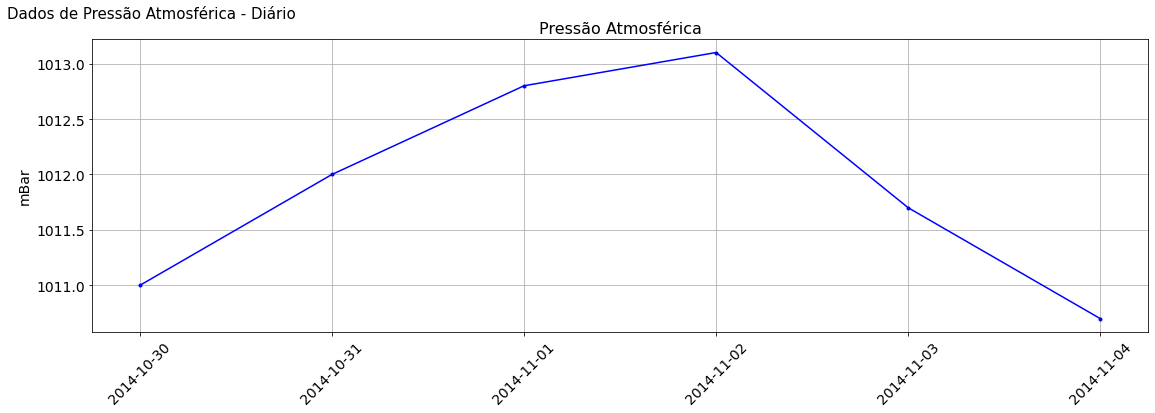

In [54]:
# Dados diários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Pressão Atmosférica - Diário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
#hora = mdates.HourLocator(interval = 1)


ax.plot(df_day_interval['timestamp'], df_day_interval['pres_corr'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('mBar', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.xaxis.set_minor_locator(min30)
ax.set_title('Pressão Atmosférica', fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/press_day.png', dpi = 300)

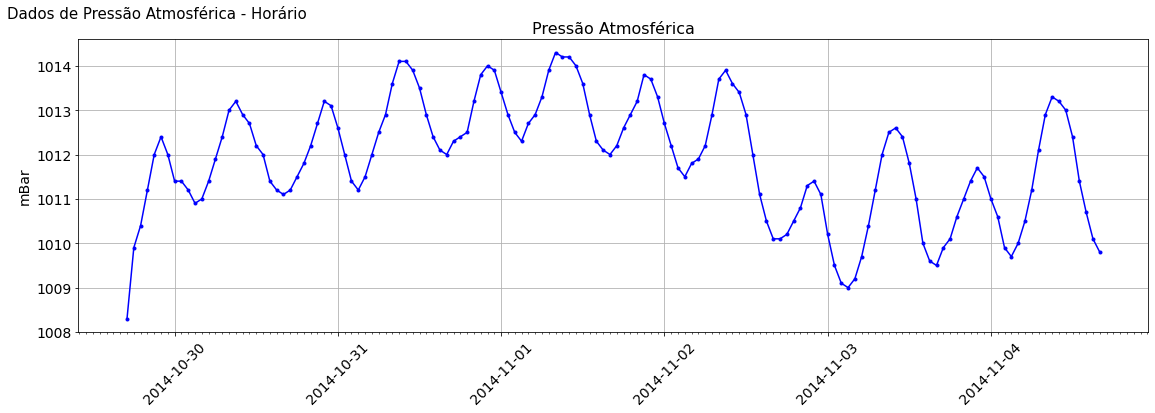

In [53]:
# Dados horários

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Pressão Atmosférica - Horário", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(df_hour_interval['timestamp'], df_hour_interval['pres_corr'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('mBar', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Pressão Atmosférica' , fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/press_hora.png', dpi = 300)

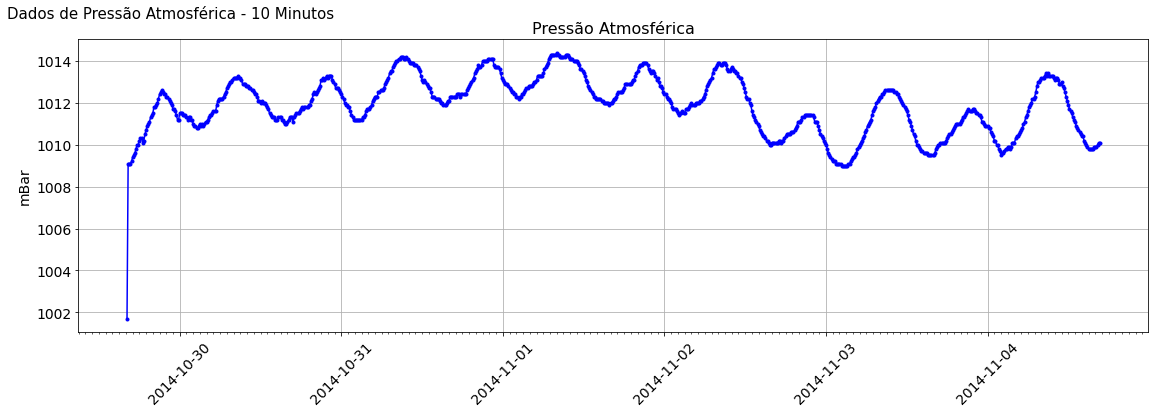

In [52]:
# Dados 10min

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Dados de Pressão Atmosférica - 10 Minutos", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(df_10min_interval['timestamp'], df_10min_interval['pres_corr'], marker=".", color = "blue")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('mBar', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(hora)
ax.set_title('Pressão Atmosférica' , fontsize=fontsize_title)
ax.tick_params(labelsize=fontsize_ticks)
#ax.legend(fontsize=fontsize_legend)
ax.grid()
    
fig.tight_layout()
plt.savefig('images/plots/press_10min.png', dpi = 300)

In [51]:
!pwd

/home/ocf/POS_UFRJ/ASSIGNMENTS/Instrumentacao_Oceanografica/Assignment_III
